# Schoridnger Equation
## Content
- TDSE: 
    - Crank-Nicolson Method
    - Eigenvalue Problem 
- TISE: 
    - Matrix Representation Method
    - Shooting Method 
    - Matching Method 
    - Numerov Method

## Crank-Nicolson Method (TDSE)
- Schordinger Equation:
$$
\begin{aligned}
\cfrac{\partial\psi}{\partial t}&=-iH\psi\\
H&=-\cfrac{1}{2}\cfrac{\partial^{2}}{\partial x^{2}}+V
\end{aligned}
$$
- Discretization:
    $$\psi_{m,j}\equiv \psi(x_m,t_j)$$
    and H can be written as a matrix. S.E. becomes: 
    $$\frac{\psi_{m,j+1  }-\psi_{m,j}}{\Delta t}=-\frac{iH}{2}\left(  \psi_{m,j+1}+\psi_{m,j}\right)$$
- Recursion:
    $$
    \begin{aligned}
    \left(  2i-\Delta tH\right)\varphi_{m,j}  &  =4i \psi_{m,j}\\
    \psi_{m,j+1 }  &  =\varphi_{m,j}-\psi_{m,j}
    \end{aligned}
    $$

## Eigenvalue Problem (TDSE)
1. Shooting method: if $u(0)=u_{0}$ and $u(\pi)=u_{1}$ are given,
    - Integrate the equation with $u^\prime(0)=$ $\alpha$, a small quantity.
    - Then we search for the root of $g(\lambda)=u_{\lambda}(\pi)-u_{1}=0$ by varying $\lambda$.
    - When $g(\lambda)=0$ is satisfied, we obtain an approximate eigenvalue   $\lambda$ and the corresponding eigenstate from the normalized solution of $u_{\lambda}(x)$.
    
2. Finite difference method: Just find the matrix's eigenvalue and eigenstate.

3. Direct analytical solution: 
    $$
    \det\left\vert A_{ij}-\lambda\delta_{ij}\right\vert =0
    $$


## Matrix Representation Method (TISE)
matrix representation of the position and momentum operators $\hat{x}$ and $\hat{p}$ in terms of the normalized eigenstates $|n\rangle$ of a harmonic oscillator $\hat{H}_0 = \hat{p}^2/2m+m\omega_0^2
\hat{x}^2/2$:
$$
\begin{aligned}
x&=\frac{x_0}{\sqrt{2}}\left(\begin{matrix}
0 & \sqrt{1} & 0 & 0 & \cdots\\
\sqrt{1}&0 & \sqrt{2}& 0 &\cdots\\
0 & \sqrt{2} & 0 & \sqrt{3} &\cdots \\
0 & 0 & \sqrt{3} & 0 & \cdots\\
\vdots & \vdots &\vdots & \vdots & \ddots 
\end{matrix}\right),\; 
p=\frac{ip_0}{\sqrt{2}}\left(\begin{matrix}
0 & -\sqrt{1} & 0 & 0 & \cdots\\
\sqrt{1}&0 & -\sqrt{2}& 0 &\cdots\\
0 & \sqrt{2} & 0 & -\sqrt{3} &\cdots \\
0 & 0 & \sqrt{3} & 0 & \cdots\\
\vdots & \vdots &\vdots & \vdots & \ddots 
\end{matrix}\right)\\
x_0&=\left(\frac{\hbar}{m\omega_0}\right)^{1/2}=\hbar^{1/2}s,\quad p_0=\left(\hbar m\omega_0\right)^{1/2}=\frac{\hbar^{1/2}}{s},\quad s=(m\omega_0)^{-1/2}
\end{aligned}
$$

In [17]:
import numpy as np 
import numpy.linalg as la
import scipy
def potential(x):
    # Morse potential
    V = np.eye(x.shape[0]) - scipy.linalg.expm(-0.3*x)
    return V@V

def OscillatorAnalysis(N, omega, mass, potential):
    # use Harmonic Oscillator's eigenstates as basis
    # N: num of basis
    # potential: callable, input x, return a matrix
    s = 1/np.sqrt(mass*omega)
    n = np.arange(1,N)
    m = np.sqrt(n)
    x = s/np.sqrt(2) * (np.diag(m,-1) + np.diag(m,1))
    p = 1j/s/np.sqrt(2) * (np.diag(m,-1) - np.diag(m,1))

    V = potential(x)
    H = np.dot(p,p)/2/mass + V
    EigVal, EigVec = la.eigh(H)
    return EigVal[0], EigVec[:, 0]        # E[0] is the largest E, return the whole E is OK

def GetEigState(EigVec, x, N):
    # N: num of x grid
    psi = np.zeros((N,len(x)))
    for k in range(N):
        #第k个基的值 psi_k(x)
        psi[k,:] = (1/np.pi)**0.25/(np.sqrt(2.0**k)*np.sqrt(1.0*np.math.factorial(k)))*scipy.special.eval_hermite(k,x)*np.exp(-x**2/2)

    return EigVec@psi

Text(0.5, 1.0, 'Energy: 0.20088')

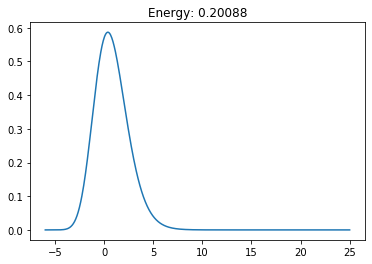

In [19]:
# test: Morse potential
import matplotlib.pyplot as plt

N = 170
E, V = OscillatorAnalysis(N, 1, 1, potential)
x = np.linspace(-6, 25, 500)
EigState = GetEigState(V, x, N)

plt.plot(x, EigState)
plt.title(f"Energy: {E:.5f}")

# Shooting Method
1. Discretize:
    $$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}\approx -\frac{\hbar^2}{2m}\frac{\psi_{n+1}+\psi_{n-1}-2\psi_n}{(\delta x)^2}\approx (E-V_n)\psi_n$$
    Shoot:
    $$\psi_{n+1}=2\psi_n-\psi_{n-1}-2(\Delta x)^2(E-V_n)\psi_n$$

2. If $V$ is symetrical, Integral on half of the interval. 
3. Initial value:
    - Even parity: $\psi_0=1,\quad \psi^\prime_0=0,\quad \psi_1=1$
    - Odd parity: $\psi_0=0,\quad \psi^\prime_0=1,\quad
    \psi_1 = \Delta x$
4. Target: $\psi_N=0$

In [ ]:
# from HJH
def potential(x):
    # potential
    return ###

def se_shooting(E=0.1, parity='even', dx=0.01, dE=0.01, b=5, xmax=6):
    # initial guess of energy E, increment dE
    # wavefunction with define k1, k2
    # step size of x grid dx
    # cutoff parameter b 
    
    x = np.arange(0, xmax+dx, dx)
    N = len(x)

    def initialize_psi(N,dx,parity='even'):
        # intialize wave function
        psi = np.zeros(N)

        if parity == 'even':
            # initial condition of even partiy solution
            psi[0] = 1
            psi[1] = psi[0]
        else:
            # initial condition of odd partiy solution
            psi[0] = 0
            psi[1] = dx
        return psi  
   
    psi = initialize_psi(N,dx,parity)
    tol = 0.5e-5   # stopping criterion, if wave function converges

    # initialize last_diverge which keeps tracks of the direction of the divergin trned
    last_diverge = 0 # we don't kow this direction a priori

    dx2 = dx * dx
    while True:
        for i in range(2,N-2):
            psi[i] = 2*psi[i-1] - psi[i-2] - 2 * (E - potential(x[i-1])) * psi[i-1] * dx2
            if abs(psi[i]) > b:
                break

        if abs(dE) < tol:
            break

        if psi[i] * last_diverge < 0:
            dE = -dE / 2
        E = E + dE
        last_diverge = np.sign(psi[i])
    
    xi = np.concatenate([-x[-1:0:-1],x])                   

    if psi[0] == 0:
        psii = np.concatenate([-psi[-1:0:-1],psi])
    else:
        psii = np.concatenate([psi[-1:0:-1],psi])
    psii = psii / np.sqrt(np.sum(psii * psii)) # normalisation

    return E,xi,psii 

## Matching Method
- Integrate from left and right, and match near the minimum of the potential. 

## Numerov Method
pass